In [1]:
import numpy as np
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm
from torch.utils.data import DataLoader, random_split, TensorDataset
from torchvision import transforms

In [ ]:
# Load and preprocess the datasets
transform = torchvision.transforms.ToTensor()

# Download and transform the FashionMNIST training data
training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

# Download and transform the FashionMNIST validation data
validation_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

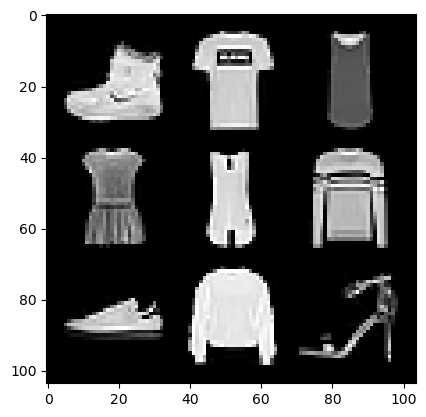

In [ ]:
# Display a grid of sample images from the training dataset
images = [training_data[i][0] for i in range(9)]
plt.imshow(torchvision.utils.make_grid(torch.stack(images), nrow=3, padding=5).numpy().transpose((1, 2, 0)))

In [13]:
# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Extract training and testing data and targets
X_train = training_data.data
Y_train = training_data.targets
X_test = validation_data.data
Y_test = validation_data.targets

# Flatten the images from 2D to 1D and normalize pixel values
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

X_train_reshape = X_train_reshape / 255.0
X_test_reshape = X_test_reshape / 255.0

# Create TensorDatasets for training and testing
dataset_train = TensorDataset(X_train_reshape, Y_train)
dataloader_train = DataLoader(dataset_train, batch_size=10, shuffle=True)

dataset_test = TensorDataset(X_test_reshape, Y_test)
dataloader_test = DataLoader(dataset_test, batch_size=10, shuffle=False)

# Define a multi-layer neural network
class MultiLayerNN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        # First hidden layer
        self.hidden1 = nn.Linear(in_dim, hidden_dim)
        # Second hidden layer
        self.hidden2 = nn.Linear(hidden_dim, hidden_dim)
        # Output layer
        self.output = nn.Linear(hidden_dim, out_dim)
        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Pass input through first hidden layer and apply ReLU
        x = self.relu(self.hidden1(x))
        # Pass output through second hidden layer and apply ReLU
        x = self.relu(self.hidden2(x))
        # Compute output predictions
        x = self.output(x)
        return x

# Initialize hyperparameters
in_dim = X_train_reshape.shape[1]  # Input dimension
hidden_dim = 256                   # Number of neurons in the hidden layers
out_dim = 10                       # Number of output classes
learning_rate = 0.05               # Learning rate
batch_size = 10                    # Batch size
epochs = 50                        # Number of training epochs

# Initialize the model, optimizer, and loss function
model = MultiLayerNN(in_dim, hidden_dim, out_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
model.train()

# Training loop
for epoch in range(epochs):
    training_losses = []
    for batch in dataloader_train:
        x, y = batch[0].to(device), batch[1].to(device)  # Move data to the device
        optimizer.zero_grad()                           # Zero the gradients
        pred = model(x)                                 # Forward pass
        loss = criterion(pred, y)                      # Compute loss
        loss.backward()                                 # Backpropagation
        optimizer.step()                                # Update parameters
        training_losses.append(loss.item())            # Record training loss
    print("Finished Epoch", epoch + 1, ", training loss:", np.mean(training_losses))

# Evaluate model on the training set
with torch.no_grad():
    model.eval()
    num_correct = 0
    total_samples = 0
    for batch in dataloader_train:
        x, y = batch[0].to(device), batch[1].to(device)
        pred = model(x)
        predicted_labels = torch.argmax(pred, dim=1)   # Get predicted labels
        num_correct += (predicted_labels == y).sum().item()
        total_samples += y.size(0)
    print("Final Accuracy on Training Set: ", num_correct / total_samples)
    model.train()

# Evaluate model on the testing set
with torch.no_grad():
    model.eval()
    num_correct = 0
    total_samples = 0
    for batch in dataloader_test:
        x, y = batch[0].to(device), batch[1].to(device)
        pred = model(x)
        predicted_labels = torch.argmax(pred, dim=1)   # Get predicted labels
        num_correct += (predicted_labels == y).sum().item()
        total_samples += y.size(0)
    print("Final Accuracy on Testing Set: ", num_correct / total_samples)
    model.train()


Finished Epoch 1 , training loss: 0.5396935489109407
Finished Epoch 2 , training loss: 0.3858775919807764
Finished Epoch 3 , training loss: 0.3466547735055404
Finished Epoch 4 , training loss: 0.3189981284130675
Finished Epoch 5 , training loss: 0.3011110797196937
Finished Epoch 6 , training loss: 0.28644776930883625
Finished Epoch 7 , training loss: 0.2721135996704106
Finished Epoch 8 , training loss: 0.260432105173483
Finished Epoch 9 , training loss: 0.2518404845062784
Finished Epoch 10 , training loss: 0.2406915614776808
Finished Epoch 11 , training loss: 0.23382044075997935
Finished Epoch 12 , training loss: 0.22452899245498703
Finished Epoch 13 , training loss: 0.21748330891490575
Finished Epoch 14 , training loss: 0.21011560964870782
Finished Epoch 15 , training loss: 0.2028554238113399
Finished Epoch 16 , training loss: 0.19511086330219649
Finished Epoch 17 , training loss: 0.18997958342028626
Finished Epoch 18 , training loss: 0.18518348609368818
Finished Epoch 19 , training l